# Aim

Compute and plot rejection transfer functions for different closed-loop gain values.

In [121]:
import os
import numpy as np
from scipy.signal import welch, windows
from matplotlib import pyplot as plt

datapath = "../data/bench/closedloop/"
fileslist = list(filter(lambda x: (x.find("30_07_2021_15") != -1) and (x.startswith("cl_gain")), os.listdir(datapath)))

In [122]:
def genpsd(tseries, dt, nseg=4):
    nperseg = 2**int(np.log2(tseries.shape[0]/nseg)) 
    # firstly ensures that nperseg is a power of 2 
    # secondly ensures that there are at least nseg segments per total time series length for noise averaging
    window = windows.hann(nperseg)
    freq, psd = welch(tseries, fs=1./dt, window=window, noverlap=nperseg*0.25, nperseg=nperseg, detrend=False,scaling='density')
    freq, psd = freq[1:],psd[1:] #remove DC component (freq=0 Hz)
    return freq, psd

In [123]:
fileslist

['cl_gain_0.6_leak_1.0_tt_dt_30_07_2021_15_28_30.npy',
 'cl_gain_0.25_leak_1.0_time_dt_30_07_2021_15_25_31.npy',
 'cl_gain_0.25_leak_1.0_tt_dt_30_07_2021_15_25_31.npy',
 'cl_gain_0.7_leak_1.0_time_dt_30_07_2021_15_29_59.npy',
 'cl_gain_0.55_leak_1.0_tt_dt_30_07_2021_15_28_04.npy',
 'cl_gain_0.05_leak_1.0_tt_dt_30_07_2021_15_23_50.npy',
 'cl_gain_0.1_leak_1.0_time_dt_30_07_2021_15_24_15.npy',
 'cl_gain_0.1_leak_1.0_tt_dt_30_07_2021_15_24_15.npy',
 'cl_gain_1.0_leak_1.0_time_dt_30_07_2021_15_32_31.npy',
 'cl_gain_0.9_leak_1.0_time_dt_30_07_2021_15_31_40.npy',
 'cl_gain_0.95_leak_1.0_tt_dt_30_07_2021_15_32_05.npy',
 'cl_gain_0.65_leak_1.0_time_dt_30_07_2021_15_28_55.npy',
 'cl_gain_0.85_leak_1.0_time_dt_30_07_2021_15_31_15.npy',
 'cl_gain_0.55_leak_1.0_time_dt_30_07_2021_15_28_04.npy',
 'cl_gain_0.75_leak_1.0_time_dt_30_07_2021_15_30_24.npy',
 'cl_gain_0.8_leak_1.0_tt_dt_30_07_2021_15_30_49.npy',
 'cl_gain_0.4_leak_1.0_tt_dt_30_07_2021_15_26_48.npy',
 'cl_gain_0.5_leak_1.0_tt_dt_30_07_202

In [124]:
cl_data = {}
gainvals = []
for f in fileslist:
    gain = f[8:8+f[8:].index("_")]
    if gain not in gainvals:
        gainvals.append(gain)
    if f.find("time") != -1:
        timefile = f
        ttfile = f.replace("time", "tt")
    else:
        timefile = f.replace("tt", "time")
        ttfile = f
    times = np.load(datapath + timefile)
    ttvals = np.load(datapath + ttfile)
    cl_data[gain] = (times, ttvals)

In [125]:
times_ol, ttvals_ol = cl_data["0.0"]
f_ol, p_ol = genpsd(ttvals_ol[:,0], dt=0.02)

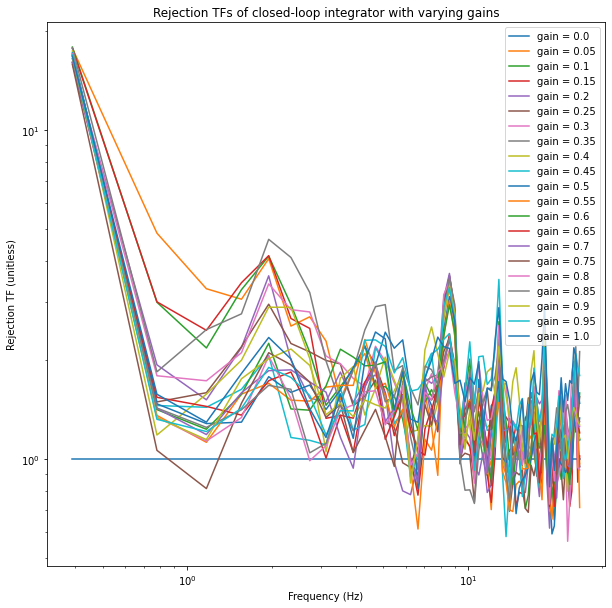

In [126]:
rtfs = {}
plt.figure(figsize=(10,10))
for gain in np.sort(gainvals):
    f, p = genpsd(cl_data[gain][1][:,0], dt=0.02)
    plt.loglog(f_ol, np.sqrt(p / p_ol), label="gain = " + gain)
    rtfs[gain] = np.sqrt(p / p_ol)
    
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Rejection TF (unitless)")
plt.title("Rejection TFs of closed-loop integrator with varying gains")
plt.savefig("../plots/rtfs.pdf")

Text(0.5, 1.0, 'OL and CL PSDs at gain = 0.25')

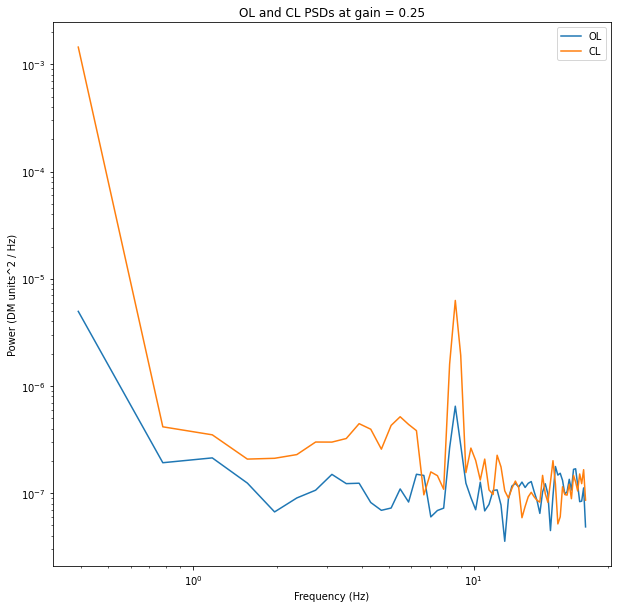

In [128]:
plt.figure(figsize=(10,10))
plt.loglog(f_ol, p_ol, label="OL")
plt.loglog(f_ol, rtfs["0.5"]**2 * p_ol, label="CL")
plt.legend()
plt.xlabel("Frequency (Hz)")
plt.ylabel("Power (DM units^2 / Hz)")
plt.title("OL and CL PSDs at gain = 0.25")